In [3]:
import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.__version__
import sys
from scipy import stats
%matplotlib inline
warnings.filterwarnings("ignore")

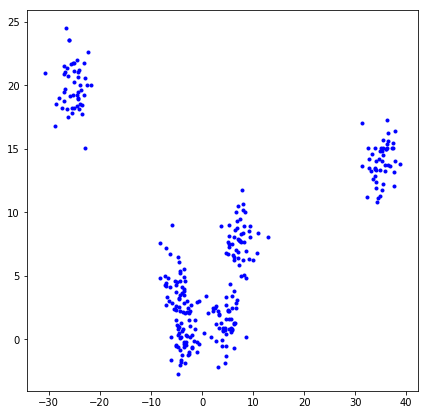

In [2]:
# two dimensional example: six datasets (d0, d1, d2, d3, d4, d5)
fig = plt.figure()

N = 50
d0 = 1.6*np.random.randn(N,2)
d0[:,0]= d0[:,0] - 3
plt.plot(d0[:,0],d0[:,1],'.b')

d1 = 1.6*np.random.randn(N,2)+7.6
plt.plot(d1[:,0],d1[:,1],'.b')

d2 = 1.6*np.random.randn(N,2)
d2[:,0]= d2[:,0] + 5
d2[:,1]= d2[:,1] + 1
plt.plot(d2[:,0],d2[:,1],'.b')

d3 = 1.6*np.random.randn(N,2)
d3[:,0]= d3[:,0] - 5
d3[:,1]= d3[:,1] + 4
plt.plot(d3[:,0],d3[:,1],'.b')


d4 = 1.8*np.random.randn(N,2)
d4[:,0]= d4[:,0] - 25
d4[:,1]= d4[:,1] + 20
plt.plot(d4[:,0],d4[:,1],'.b')


d5 = 1.8*np.random.randn(N,2)
d5[:,0]= d5[:,0] + 35
d5[:,1]= d5[:,1] + 14
plt.plot(d5[:,0],d5[:,1],'.b')
Data1 = np.concatenate((d0,d1,d2,d3,d4,d5))
fig.set_size_inches(7,7)

In [133]:
d1

array([[ 9.91814479,  6.26041719],
       [ 8.54140422,  6.96201832],
       [ 4.64467693,  6.81255328],
       [ 7.43984634,  7.72741346],
       [ 5.38180557,  8.11430018],
       [ 8.70858377,  4.85888601],
       [ 7.36793851,  7.74036697],
       [ 5.94102309,  7.50029915],
       [ 7.71944207,  7.63131014],
       [ 8.30096666,  8.90372798],
       [ 7.97800409,  6.27984994],
       [ 5.15845812,  6.6958285 ],
       [ 8.30518289,  5.08929039],
       [ 3.64631607,  8.92541405],
       [ 7.6061028 ,  8.29650714],
       [ 6.98373043,  6.89601903],
       [ 6.32973248,  6.21452796],
       [ 6.97661448, 10.47997592],
       [ 6.67855752,  6.99957419],
       [ 7.94554401, 10.65963049],
       [ 8.00389882, 10.21701715],
       [ 9.33337319,  8.08368185],
       [10.68594906,  6.8123167 ],
       [10.93409739,  8.39767069],
       [ 7.55561213,  5.01299206],
       [ 6.99178437,  6.3850345 ],
       [ 7.30304239,  7.80156093],
       [ 5.22532856,  7.23488497],
       [ 6.08827547,

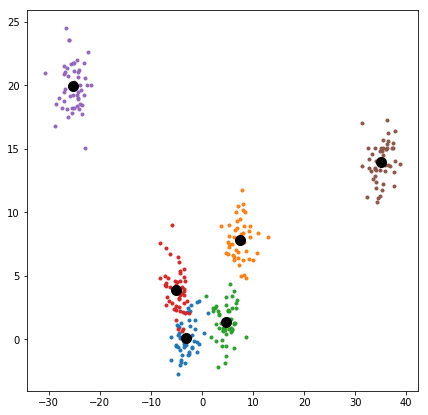

In [3]:
# plot means for datasets
# A two dimensional example
fig = plt.figure()
plt.plot(d0[:,0],d0[:,1],'.')
plt.plot(d1[:,0],d1[:,1],'.')
plt.plot(d2[:,0],d2[:,1],'.')
plt.plot(d3[:,0],d3[:,1],'.')
plt.plot(d4[:,0],d4[:,1],'.')
plt.plot(d5[:,0],d5[:,1],'.')

mu0= d0.mean(axis=0)[np.newaxis,:]
mu1= d1.mean(axis=0)[np.newaxis,:]
mu2= d2.mean(axis=0)[np.newaxis,:]
mu3= d3.mean(axis=0)[np.newaxis,:]
mu4= d4.mean(axis=0)[np.newaxis,:]
mu5= d5.mean(axis=0)[np.newaxis,:]
mus = np.concatenate((mu0,mu1,mu2,mu3,mu4,mu5),axis=0)

plt.plot(mus[:,0],mus[:,1],'ok',markersize=10)

fig.set_size_inches(7,7)

### how to get these center points by data clustering?

- measure of similarity
- which dimensions (features)
- how many clusters (groups)

In [4]:
N = 50
x1= np.random.normal(loc=0,scale=1,size=N)[:,np.newaxis]
x2= np.random.normal(loc=0,scale=5,size=N)[:,np.newaxis]
y = 3*x1 + np.random.normal(loc=.0, scale=.7, size=N)[:,np.newaxis]
def linear_regressor(a,b):
    mn = np.min(x1)
    mx = np.max(x1)
    xrng =  np.linspace(mn,mx,num=500)
    y_ = [a*x + b for x in xrng]
    
    
    fig = plt.figure(figsize=(7,7))
    ax1= plt.subplot(111)
    plt.plot(x1,y,'or',markersize=10,alpha=.4 );
    plt.xlabel('x1');
    plt.ylabel('y');
    plt.plot(xrng,y_,'-b',linewidth=1)
   
    yy = [a*x + b for x in x1]
    
    [plt.plot([x1[i],x1[i]],[yy[i],y[i]],'-r',linewidth=1) for i in range(len(x1))];

in relation to regression problem


In [5]:
print("in relation to regression problem")
from ipywidgets import interact, HTML, FloatSlider
interact(linear_regressor,a=(-3,6,.2),b=(-2,5,.2));

in relation to regression problem


interactive(children=(FloatSlider(value=1.0, description='a', max=6.0, min=-3.0, step=0.2), FloatSlider(value=1.0, description='b', max=5.0, min=-2.0, step=0.2), Output()), _dom_classes=('widget-interact',))

### objective function

In [6]:
# find K vectors (n dimensional points) where, these objective function is minimum
import scipy.spatial.distance as DIST
def Assign_Sets(mus,X):
    Dists = DIST.cdist(X,mus)
    ind_sets = np.argmin(Dists,axis=1)
    min_dists = np.min(Dists,axis=1)
    energy = np.sum(min_dists**2)
    return ind_sets, energy


def Visualize_assigned_sets(mu00=None,mu01=None,mu10=None,mu11=None,mu20=None,mu21=None):
    mus0 = np.asarray([mu00,mu10,mu20])[:,np.newaxis]
    mus1 = np.asarray([mu01,mu11,mu21])[:,np.newaxis]
    mus = np.concatenate((mus0,mus1),axis=1)
    ind_sets,energy = Assign_Sets(mus,X)
    
    fig = plt.figure(figsize=(7,7))
    ax1= plt.subplot(111)
    
    for k,mu in enumerate(mus):
        ind = ind_sets==k
        DD = X[ind]
        plt.plot(DD[:,0],DD[:,1],'.',markersize=10,alpha=.4 );
        plt.plot(mu[0],mu[1],'ob',markersize=10,alpha=.4 );
        
        [plt.plot([DD[i,0],mu[0]],[DD[i,1],mu[1]],'-k',linewidth=.1) for i in range(len(DD))];

In [13]:
X = Data1.copy() # Data1 is a concatenation of d0 to d5 datasets wtih 50 values each
mn = np.min(X,axis=0)
mx = np.max(X,axis=0)
R = mx-mn
#print(mn[0], mn[1], '\n', mx[0], mx[1], '\n', R)

# Assume K = 3

from ipywidgets import interact, HTML, FloatSlider
interact(Visualize_assigned_sets,mu00=(mn[0],mx[0],1),mu01=(mn[1],mx[1],1),
                        mu10=(mn[0],mx[0],1),mu11=(mn[1],mx[1],1),
                        mu20=(mn[0],mx[0],1),mu21=(mn[1],mx[1],1));


interactive(children=(FloatSlider(value=3.2023735721916005, description='mu00', max=38.725636498284054, min=-30.7976264278084, step=1.0), FloatSlider(value=10.319740424629023, description='mu01', max=24.529086529840853, min=-2.680259575370977, step=1.0), FloatSlider(value=3.2023735721916005, description='mu10', max=38.725636498284054, min=-30.7976264278084, step=1.0), FloatSlider(value=10.319740424629023, description='mu11', max=24.529086529840853, min=-2.680259575370977, step=1.0), FloatSlider(value=3.2023735721916005, description='mu20', max=38.725636498284054, min=-30.7976264278084, step=1.0), FloatSlider(value=10.319740424629023, description='mu21', max=24.529086529840853, min=-2.680259575370977, step=1.0), Output()), _dom_classes=('widget-interact',))

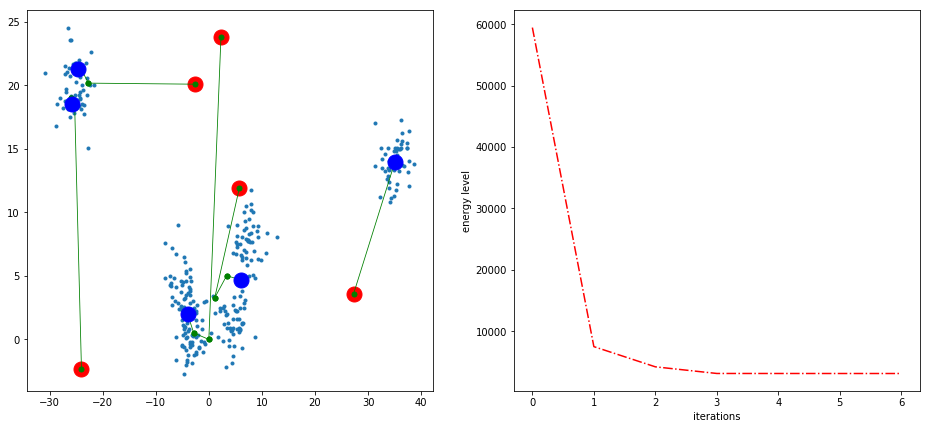

In [15]:
'''
    initiate K random centers and assign each data point to its closest center.
    Now we have K sets. Within each sets, update the location of the center to minimize the above objective function.
    Due to the structure of these objective function, the mean vector of each set gives the minimum value.
    Therefore, simply update the locations of center points to the mean vector of each set.
    repeat the above steps, until the difference between two sequential centers are less than a threshhold
'''
def update_mus(ind_sets,X,K):
    
    n_mus = np.zeros((K,X.shape[1]))
    for k in range(K):
        ind = ind_sets==k
        DD = X[ind]
        if DD.shape[0]>0:
            n_mus[k,:]=np.mean(DD,axis=0)
        else: 
            continue
    return n_mus

K =5
mus_t = np.zeros((K,X.shape[1])) 
mus_0 = np.zeros((K,X.shape[1])) 
fig = plt.figure(figsize=(16,7));
thresh = .01
mus_0[:,0] = mn[0] + np.random.random(size=K)*R[0]
mus_0[:,1] = mn[1] + np.random.random(size=K)*R[1]
mus_t = mus_0.copy() 
diff = 1000
plt.subplot(1,2,1);
plt.plot(X[:,0],X[:,1],'.');
[plt.plot(mus_t[i,0],mus_t[i,1],'or',markersize=15,linewidth=.1,label='initial') for i in range(K)];
all_diffs =  []
all_energies = []
while diff> thresh:
    ind_sets, energy = Assign_Sets(mus_t,X)
    all_energies.append(energy)
    mus_tp = update_mus(ind_sets,X,K)
    diff = np.abs(mus_t- mus_tp).sum(axis=1).sum().copy()
    [plt.plot([mus_t[i,0],mus_tp[i,0]],[mus_t[i,1],mus_tp[i,1]],'-og',markersize=5,linewidth=.8) for i in range(K)];

    all_diffs.append(diff)
    mus_t= mus_tp.copy()
[plt.plot(mus_tp[i,0],mus_tp[i,1],'ob',markersize=15,linewidth=.1,label='final') for i in range(K)];

plt.subplot(1,2,2);
plt.plot(all_energies,'-.r');
plt.ylabel('energy level');
plt.xlabel('iterations');

In [16]:
def K_means(X,K):
    mus_t = np.zeros((K,X.shape[1])) 
    mus_0 = np.zeros((K,X.shape[1])) 
    thresh = .01
    mus_0[:,0] = mn[0] + np.random.random(size=K)*R[0]
    mus_0[:,1] = mn[1] + np.random.random(size=K)*R[1]
    mus_t = mus_0.copy() 
    diff = 1000
    all_diffs =  []
    all_energies = []
    while diff> thresh:
        ind_sets, energy = Assign_Sets(mus_t,X)
        all_energies.append(energy)
        mus_tp = update_mus(ind_sets,X,K)
        diff = np.abs(mus_t- mus_tp).sum(axis=1).sum().copy()

        all_diffs.append(diff)

        mus_t= mus_tp.copy()
    return mus_t,all_diffs,all_energies

#### the effect of chosen K
" k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells"

In [19]:
K =5

def visualize_Kmeans(K=5):
    centers, diffs, energies = K_means(X,K) 
    ind_sets,energy = Assign_Sets(centers,X)
    fig = plt.figure()
    for k in range(K):
#         print 
        ind = ind_sets==k
        DD = X[ind]
        plt.plot(DD[:,0],DD[:,1],'o',alpha=0.5, markersize=4,color=plt.cm.RdYlBu_r(float(k)/K));
        plt.plot(centers[k,0],centers[k,1],marker='o',markersize=15,alpha=1.,color=plt.cm.RdYlBu_r(float(k)/K));
    fig.set_size_inches(7,7)

In [18]:
from ipywidgets import interact, HTML, FloatSlider
X = Data1
interact(visualize_Kmeans,K=(1,10,1));

interactive(children=(IntSlider(value=5, description='K', max=10, min=1), Output()), _dom_classes=('widget-interact',))

In [20]:
# does each data point have the most alignment with the its own cluster center? verify by calculating the dot products
from sklearn.cluster import KMeans
n_clusters = 2
X = np.concatenate((d3,d4,d5))
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
kmeans.cluster_centers_.shape

(2, 2)

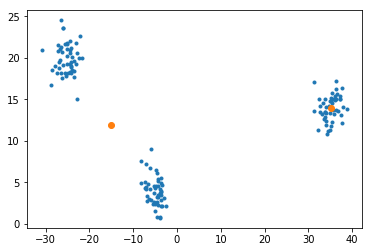

In [21]:
plt.plot(X[:,0],X[:,1],'.')
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'o')

each cluster center can be seen as a kind of new dimensionality (A vector in n dimensional vector space)

it is a cartesian space, where the bases are not necessarily orthogonal - they have overlapping information

Text(0,0.5,'cluster 1 direction')

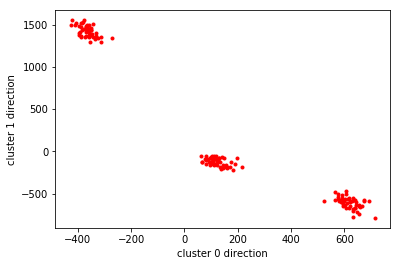

In [22]:
X_transformed_kmeans = X.dot(kmeans.cluster_centers_.T)
X_transformed_kmeans.shape
plt.plot(X_transformed_kmeans[:,0],X_transformed_kmeans[:,1],'.r')
plt.xlabel('cluster 0 direction')
plt.ylabel('cluster 1 direction')

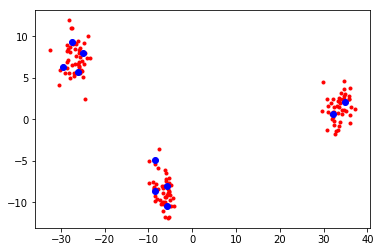

In [24]:
# increase the number of clusters
# If we increase the the number of clusters
from sklearn.cluster import KMeans
n_clusters = 10
X = np.concatenate((d3,d4,d5))
X = X-np.mean(X,axis=0)
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
kmeans.cluster_centers_.shape

X_transformed_kmeans = X.dot(kmeans.cluster_centers_.T)
X_transformed_kmeans.shape

plt.plot(X[:,0],X[:,1],'.r');
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'ob');

Each cluster is a dimensionality

Each line is a data point in the original space

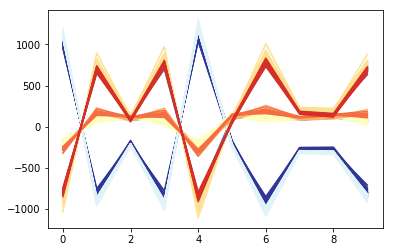

In [25]:
cluster_inds = kmeans.predict(X)
for i in range(n_clusters):
#     plt.plot(X_transformed_kmeans[cluster_inds==i].T,'C{}'.format(i));
    plt.plot(X_transformed_kmeans[cluster_inds==i].T,'-',color=plt.cm.RdYlBu_r(float(i)/n_clusters));

In [27]:
# Just for visulization of nn architecture
#Taken from: https://gist.github.com/craffel/2d727968c3aaebd10359
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    print (v_spacing/4)
    radius = np.min([v_spacing/4,.03])
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), radius,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
        
            if n==0:
                if m<5:
                    ax.text(n*h_spacing + .9*left, layer_top - m*v_spacing,'$x_{}$'.format(m) , fontsize=10,zorder=10)
            elif n==(len(layer_sizes)-1):
                if m<5:
                    ax.text(n*h_spacing + .9*left, layer_top - m*v_spacing,'$y_{}$'.format(m) , fontsize=10,zorder=10)
            else:
                if m<5:
                    ax.text(n*h_spacing + .9*left, layer_top - m*v_spacing,'$f_{}$'.format(m) , fontsize=10,zorder=10)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='gray')
                x = n*h_spacing + left
                y = layer_top_a - m*v_spacing
                dx = (n + 1)*h_spacing + left - x - 1.3*radius
                dy = layer_top_b - o*v_spacing -y 
                line = plt.arrow(x,y,dx,dy, color='gray',head_width=.01,head_length=.01)
                ax.add_artist(line)

0.02


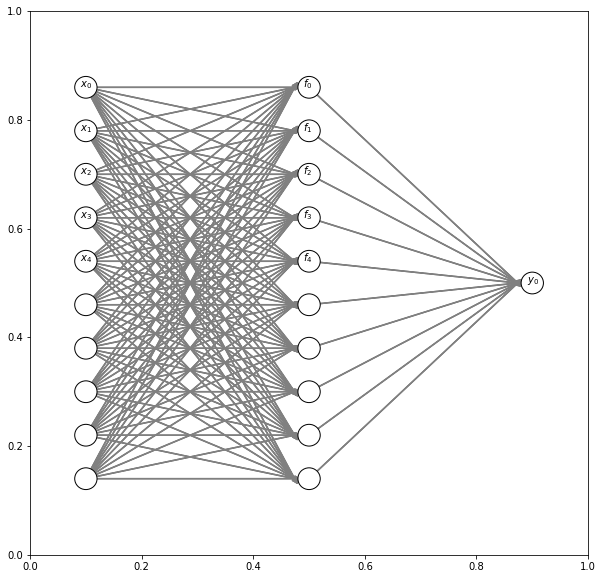

In [28]:
fig = plt.figure(figsize=(10, 10))
draw_neural_net(fig.gca(), .1, .9, .1, .9, [10,10,1],)

In [29]:
# Increase K in K-means significantly
# towards a spectrum of dimensionalities
# Colors correspond to the cluster index
from ipywidgets import interact, HTML, FloatSlider
X = Data1
interact(visualize_Kmeans,K=(20,300,10));

interactive(children=(IntSlider(value=20, description='K', max=300, min=20, step=10), Output()), _dom_classes=('widget-interact',))

### Self Organizing Maps 
a spectrum of dimensionalities

In [30]:
import numpy as np

def normalize_by(data_raw, data, method='var'):
    me = np.mean(data_raw, axis = 0)
    st = np.std(data_raw, axis = 0)
    if method == 'var':
        n_data = (data-me)/st
        return n_data
        
def denormalize_by(data_by, n_vect, n_method = 'var'):
    #based on the normalization
    if n_method == 'var':
        me = np.mean(data_by, axis = 0)
        st = np.std(data_by, axis = 0)
        vect = n_vect* st + me
        return vect 
    else:
        print('data is not normalized before')
        return n_vect  
    
def random_initialize(mapszie,data):
    nnodes = mapsize[0]*mapsize[1]
    dim = data.shape[1]
    #It produces random values in the range of min- max of each dimension based on a uniform distribution
    mn = np.tile(np.min(data, axis =0)-1.5, (nnodes,1))
    mx = np.tile(np.max(data, axis =0)+1.5, (nnodes,1))
    init_W = mn + (mx-mn)*(np.random.rand(nnodes,dim))
    return init_W

def rect_dist(mapsize,bmu):
    #the way we consider the list of nodes in a planar grid is that node0 is on top left corner,
    #nodemapsz[1]-1 is top right corner and then it goes to the second row. 
    #no. of rows is map_size[0] and no. of cols is map_size[1]
    rows = mapsize[0]
    cols = mapsize[1]
    
    #bmu should be an integer between 0 to no_nodes
    if 0<=bmu<=(rows*cols):
        c_bmu = int(bmu%cols)
        r_bmu = int(bmu/cols)
    else:
        print('wrong bmu')
      
    #calculating the grid distance
    if np.logical_and(rows>0 , cols>0): 
        r,c = np.arange(0, rows, 1)[:,np.newaxis] , np.arange(0,cols, 1)
        dist2 = (r-r_bmu)**2 + (c-c_bmu)**2
        return dist2.ravel()
    else:
        print('please consider the above mentioned errors')
        return np.zeros((rows,cols)).ravel()


def calculate_UD2(mapsize):
    nnodes = mapsize[0]*mapsize[1]
    UD2 = np.zeros((nnodes, nnodes))
    for i in range(nnodes):
        UD2[i,:] = rect_dist(mapsize,i).reshape(1,nnodes)
    return UD2

def calculate_neigh_activation(UD2,bmu,radius):
    # 'Guassian'
    return np.exp(-1.0*UD2[bmu]/(2.0*radius**2))


def find_bmu(data,W):
    import scipy.spatial.distance as DIST
    Dists = DIST.cdist(data,W)
    ind_sets = np.argmin(Dists,axis=1)
    return Dists,ind_sets


#Learning rate adaptation
def calc_alpha(t,alpha0,T,method='linear'):
    if method =='linear':
        return alpha0*(1-t/float(T))
    if method =='power':
        return alpha0*(.005/alpha0)**(float(t)/T)
    if method =='inv':
        return alpha0/(1+100*t/float(T))

In [31]:
def train_som_online(data,mapsize,trainlen):
    # mapsize = [10,10]
    dlen = len(data) 
    #normalize the data
    data_n = normalize_by(data, data, method='var');
    #Initialize the map
    W = random_initialize(mapsize,data_n);
    UD2 = calculate_UD2(mapsize);
    alpha0 = .5
    if min(mapsize)==1:
        radiusin = max(mapsize)/float(2)
    else:
        radiusin = max(mapsize)/float(6)  
    radiusfin = max([1,radiusin/float(4)])
    radiusfin = radiusin/float(10)
    print(radiusin,radiusfin)
    radius = np.linspace(radiusin, radiusfin, trainlen)
    qe = []
    Ws = []
    W_denorm = denormalize_by(data, W.copy(), n_method = 'var')
    Ws.append(W_denorm.copy())
    for i in range(trainlen):        
        #all or a sample 
        data_e = np.random.permutation(data_n)[:]
        qe_t = np.zeros((data_e.shape[0],1))
        for j, d in enumerate(data_e):
            #project using a distance function
            #find bmu
            #Competition between nodes
            Dists,bmu = find_bmu(d[np.newaxis,:],W)
            qe_t[j] = np.min(Dists)
            # Adapt nodes
            #distance to bmu in the lower dimensional space
            neiboring_effect = calculate_neigh_activation(UD2,bmu,radius[i])
            #learning rate
            alpha = calc_alpha(i,alpha0,trainlen,method='inv')
            #Adapatation 
            W[:] = W[:] + neiboring_effect.T * alpha * (d-W[:])
        W_denorm = denormalize_by(data, W.copy(), n_method = 'var')
        Ws.append(W_denorm.copy())
        if i%10==0:
            print('iteration {}: alpha: {}, raduis: {} and quantization error is {}'.format(i,alpha,radius[i],np.mean(qe_t)))
        qe.append(np.mean(qe_t))
    Ws = np.asarray(Ws)
    return W, qe,Ws

In [32]:
data = Data1
mapsize = [40,40]
trainlen = 400
W, qe,Ws = train_som_online(data,mapsize,trainlen)
codebook = denormalize_by(data, W, n_method = 'var')

6.666666666666667 0.6666666666666667
iteration 0: alpha: 0.5, raduis: 6.666666666666667 and quantization error is 0.0991331508561234
iteration 10: alpha: 0.14285714285714285, raduis: 6.516290726817043 and quantization error is 0.07533827076460181
iteration 20: alpha: 0.08333333333333333, raduis: 6.365914786967419 and quantization error is 0.06868851008976697
iteration 30: alpha: 0.058823529411764705, raduis: 6.215538847117795 and quantization error is 0.06465518945988637
iteration 40: alpha: 0.045454545454545456, raduis: 6.065162907268171 and quantization error is 0.06535507266837813
iteration 50: alpha: 0.037037037037037035, raduis: 5.9147869674185465 and quantization error is 0.0626601118669619
iteration 60: alpha: 0.03125, raduis: 5.764411027568922 and quantization error is 0.058965088769936586
iteration 70: alpha: 0.02702702702702703, raduis: 5.614035087719299 and quantization error is 0.05690896991048314
iteration 80: alpha: 0.023809523809523808, raduis: 5.4636591478696745 and qua

In [37]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(data.min(axis=0)[0],data.max(axis=0)[0]), ylim=(data.min(axis=0)[1],data.max(axis=0)[1]))

dataplt, = ax.plot([], [], '.k',markersize=3)
somplt, = ax.plot([], [], 'o',markersize=3,alpha=.5,markerfacecolor='None',markeredgecolor='green')
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    dataplt.set_data([], [])
    somplt.set_data([], [])
    time_text.set_text('')
    return dataplt,somplt, time_text

def animate(i):
    dataplt.set_data(data[:,0],data[:,1])
    somplt.set_data(Ws[i][:,0],Ws[i][:,1])
    
    time_text.set_text(time_template % (i))
    return dataplt,somplt, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(0, trainlen),
                              interval=25, blit=True, init_func=init)

# ani.save('./Images/double_pendulum.mp4', fps=15)
ani.save('Imgs/SOM.mp4', fps=15, extra_args=['-vcodec', 'libx264'],dpi=200)
plt.close()

In [76]:
from IPython.display import HTML
HTML("""
<video width="600" height="400" controls>
  <source src="Imgs/SOM.mp4" type="video/mp4">
</video>
""")

In [41]:
import sompylib3.sompy as SOM
msz11 =20
msz10 = 20
X = Data1
som1 = SOM.SOM('', X, mapsize = [msz10, msz11],norm_method = 'var',initmethod='random')
som1.init_map()
som1.train(n_job = 1, shared_memory = 'no',verbose='final')
codebook1 = som1.codebook[:]
codebook1_n = SOM.denormalize_by(som1.data_raw, codebook1, n_method = 'var')


Total time elapsed: 0.551000 secodns
final quantization error: 0.027494


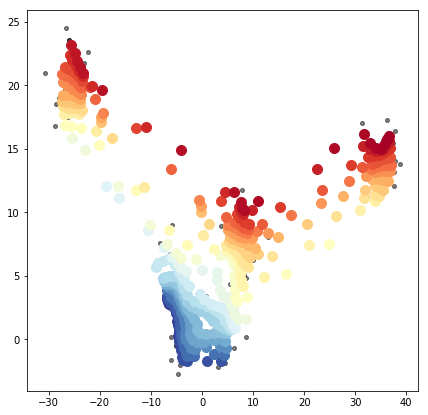

In [42]:
fig = plt.figure()
plt.plot(X[:,0],X[:,1],'ok',alpha=0.5, markersize=4);
K = som1.nnodes
for k in range(som1.nnodes):
    plt.plot(codebook1_n[k,0],codebook1_n[k,1],marker='o',markersize=10,alpha=1.,color=plt.cm.RdYlBu_r(float(k)/K));
fig.set_size_inches(7,7)

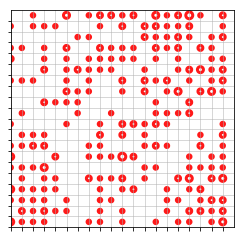

In [43]:
som1.hit_map()

In [45]:
pollution = pd.read_csv('sevamoo/DDM18/Data/Measurements.csv')
pollution.head()

,PM1-ug-m3,PM25-ug-m3,PM10-ug-m3,ParticleNumber-Nr-cm3,BlackCarbon-ug-m3,pPAHs-ng-m3,ActiveSurfaceArea-mm2-m3
0,10.280,10.857,12.540,31402.0,0.33718,17,43
1,11.430,11.430,14.171,31592.0,1.51040,17,43
2,11.425,11.425,15.221,29633.0,0.68571,17,43
3,10.861,11.430,14.171,30346.0,1.68670,17,43
4,10.861,10.861,14.171,31350.0,1.11370,17,43


In [46]:
msz11 =30
msz10 = 30
X = pollution.values[:].astype(float)
som1 = SOM.SOM('', X, mapsize = [msz10, msz11],norm_method = 'var',initmethod='pca')
som1.init_map()
som1.train(n_job = 1, shared_memory = 'no',verbose='final')


Total time elapsed: 1.493000 secodns
final quantization error: 1.255646


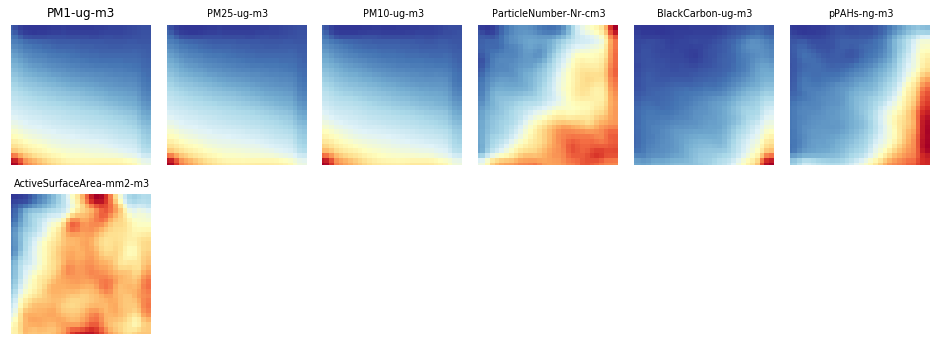

In [47]:
som1.compname = [pollution.columns[:]]
som1.view_map(text_size=8)

In [4]:
tweets_df = pd.read_json('Twitter_SCRAPING/profile_tweets.json', lines=True)
tweets_df.head()

,contributors,coordinates,created_at,delete,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,...,quoted_status_id_str,reply_count,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user
0,NaN,None,2017-03-31 08:51:20,NaN,NaN,"{'hashtags': [{'text': 'CAD', 'indices': [66, ...",NaN,NaN,0.0,0.0,...,NaN,NaN,0.0,0.0,{'created_at': 'Thu Mar 30 20:17:52 +0000 2017...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @Lynn_Allen: Check out this cool short vide...,2017-03-31 08:51:20.365,0.0,"{'id': 425197705, 'id_str': '425197705', 'name..."
1,NaN,None,2017-03-31 09:00:12,NaN,NaN,"{'hashtags': [{'text': 'BIM', 'indices': [25, ...",NaN,NaN,0.0,0.0,...,NaN,NaN,0.0,0.0,NaN,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",Nuevo proyecto normativo #BIM ha comenzado en ...,2017-03-31 09:00:12.997,0.0,"{'id': 3240514762, 'id_str': '3240514762', 'na..."
2,NaN,None,2017-03-31 09:02:02,NaN,NaN,"{'hashtags': [{'text': 'BIMScotland', 'indices...",NaN,NaN,0.0,0.0,...,NaN,NaN,0.0,0.0,{'created_at': 'Thu Mar 30 18:19:10 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",RT @BIMregScot: #BIMScotland network launch of...,2017-03-31 09:02:02.468,0.0,"{'id': 167155062, 'id_str': '167155062', 'name..."
3,NaN,None,2017-03-31 09:02:53,NaN,NaN,"{'hashtags': [{'text': 'math', 'indices': [82,...","{'media': [{'id': 845702101699317762, 'id_str'...",NaN,0.0,0.0,...,NaN,NaN,0.0,0.0,{'created_at': 'Sat Mar 25 18:21:16 +0000 2017...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @algoritmic: What are some surprising appea...,2017-03-31 09:02:53.240,0.0,"{'id': 15829471, 'id_str': '15829471', 'name':..."
4,NaN,None,2017-03-31 09:03:13,NaN,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0.0,0.0,...,NaN,NaN,0.0,0.0,{'created_at': 'Thu Mar 30 17:18:37 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",RT @diegobortolato: How Do You Cool a Data Cen...,2017-03-31 09:03:13.379,0.0,"{'id': 442238362, 'id_str': '442238362', 'name..."


In [5]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12545 entries, 0 to 12544
Data columns (total 36 columns):
contributors                 0 non-null float64
coordinates                  29 non-null object
created_at                   12389 non-null datetime64[ns]
delete                       156 non-null object
display_text_range           3875 non-null object
entities                     12389 non-null object
extended_entities            2316 non-null object
extended_tweet               1322 non-null object
favorite_count               12389 non-null float64
favorited                    12389 non-null float64
filter_level                 12389 non-null object
geo                          29 non-null object
id                           12389 non-null float64
id_str                       12389 non-null float64
in_reply_to_screen_name      2633 non-null object
in_reply_to_status_id        2209 non-null float64
in_reply_to_status_id_str    2209 non-null float64
in_reply_to_user_id        

In [15]:
print(tweets_df.place[1327])
print(tweets_df.geo[1327])
#geolocated_tweets = tweets_df[tweets_df.place.notna() == True]
#geolocated_tweets.geo.values
#coordinates_df = pd.DataFrame(list(geolocated_tweets.geo.values))
#coordinates_df.coordinates

{'id': '01e8a1a140ccdc5c', 'url': 'https://api.twitter.com/1.1/geo/id/01e8a1a140ccdc5c.json', 'place_type': 'city', 'name': 'Adelaide', 'full_name': 'Adelaide, South Australia', 'country_code': 'AU', 'country': 'Australia', 'bounding_box': {'type': 'Polygon', 'coordinates': [[[138.44213, -35.34897], [138.44213, -34.652564], [138.78019, -34.652564], [138.78019, -35.34897]]]}, 'attributes': {}}
{'type': 'Point', 'coordinates': [-34.92095059, 138.60716343]}


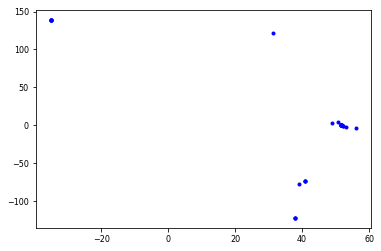

In [136]:
datica = coordinates_df.coordinates
datica_list = [item for item in datica]
daticaca = np.array(datica_list)

plt.plot(daticaca[:,0],daticaca[:,1],'.b')

#### Use SOM for Clustering

In [48]:
msz11 =30
msz10 = 30
X = Data1
som1 = SOM.SOM('', X, mapsize = [msz10, msz11],norm_method = 'var',initmethod='pca')
som1.init_map()
som1.train(n_job = 1, shared_memory = 'no',verbose='final')


Total time elapsed: 4.793000 secodns
final quantization error: 0.015028


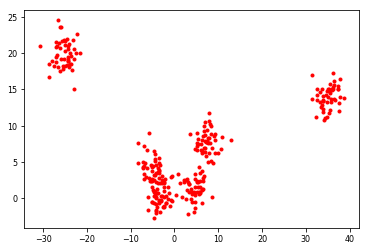

In [49]:
plt.plot(X[:,0],X[:,1],'.r')

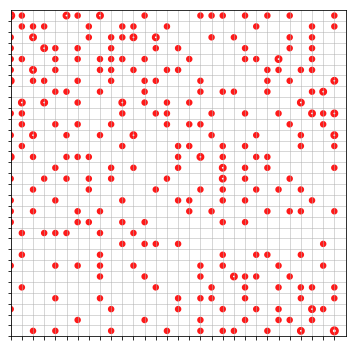

In [50]:
som1.hit_map()

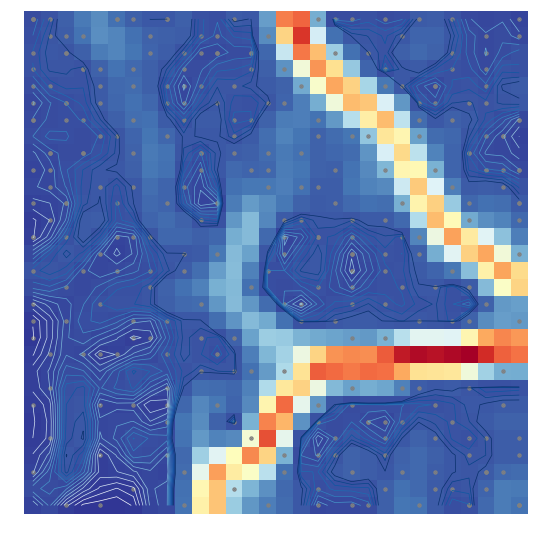

In [51]:
U = som1.view_U_matrix(distance2=2, row_normalized='No', show_data='Yes', contooor='Yes', blob='No', save='NO', save_dir='')

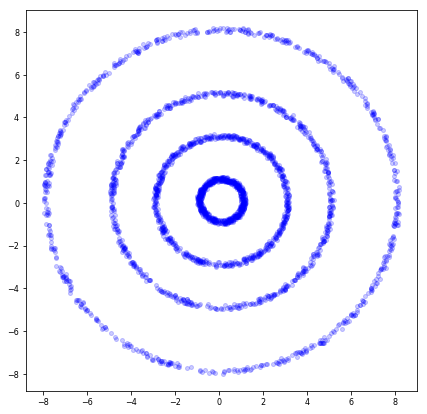

In [52]:
# try with new data

dlen = 700
tetha = np.random.uniform(low=0,high=2*np.pi,size=dlen)[:,np.newaxis]
X1 = 3*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y1 = 3*np.sin(tetha)+ .22*np.random.rand(dlen,1)
D1 = np.concatenate((X1,Y1),axis=1)

X2 = 1*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y2 = 1*np.sin(tetha)+ .22*np.random.rand(dlen,1)
D2 = np.concatenate((X2,Y2),axis=1)

X3 = 5*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y3 = 5*np.sin(tetha)+ .22*np.random.rand(dlen,1)
D3 = np.concatenate((X3,Y3),axis=1)

X4 = 8*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y4 = 8*np.sin(tetha)+ .22*np.random.rand(dlen,1)
D4 = np.concatenate((X4,Y4),axis=1)

Data3 = np.concatenate((D1,D2,D3,D4),axis=0)

fig = plt.figure()
plt.plot(Data3[:,0],Data3[:,1],'ob',alpha=0.2, markersize=4)
fig.set_size_inches(7,7)

In [53]:
# K-means clusters
# Colors correspond to the cluster index
from ipywidgets import interact, HTML, FloatSlider
X = Data3
interact(visualize_Kmeans,K=(20,300,10));

interactive(children=(IntSlider(value=20, description='K', max=300, min=20, step=10), Output()), _dom_classes=('widget-interact',))


Total time elapsed: 1.000000 secodns
final quantization error: 0.027618


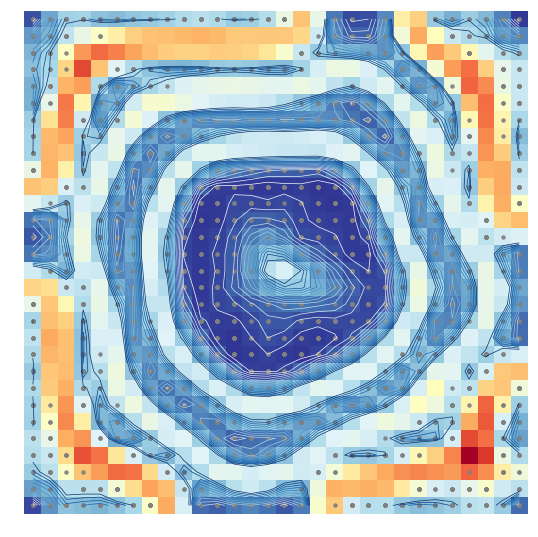

In [54]:
# csluter using SOM
import sompylib3.sompy as SOM
msz11 =30
msz10 = 30
X = Data3
som1 = SOM.SOM('', X, mapsize = [msz10, msz11],norm_method = 'var',initmethod='pca')
som1.init_map()
som1.train(n_job = 1, shared_memory = 'no',verbose='final')
U = som1.view_U_matrix(distance2=2, row_normalized='No', show_data='Yes', contooor='Yes', blob='No', save='NO', save_dir='')

In [55]:
# LONDON DATA
London = pd.read_csv('sevamoo/DDM18/Data/London.csv')
cols = London.columns.values[:]
for i,col in enumerate(cols):
    cols[i] = col.replace('measures: Value','')
London.columns = cols
London.head()

,Geography,Geography Code,Date,X,Y,Lat,Lon,Age: Age 0 to 4;,Age: Age 5 to 7;,Age: Age 8 to 9;,...,NS-SeC: 8. Never worked and long-term unemployed; Economic Activity: Economically active: Unemployed (including full-time students);,NS-SeC: 8. Never worked and long-term unemployed; Economic Activity: Economically inactive;,NS-SeC: L15 Full-time students; Economic Activity: Economically active: In employment: Employee: Part-time (including full-time students);,NS-SeC: L15 Full-time students; Economic Activity: Economically active: In employment: Employee: Full-time (including full-time students);,NS-SeC: L15 Full-time students; Economic Activity: Economically active: In employment: Self-employed: Part-time (including full-time students);,NS-SeC: L15 Full-time students; Economic Activity: Economically active: In employment: Self-employed: Full-time (including full-time students);,NS-SeC: L15 Full-time students; Economic Activity: Economically active: Unemployed (including full-time students);,NS-SeC: L15 Full-time students; Economic Activity: Economically inactive;,Greenspace: Local Parks,Greenspace: Local Parks per square km
0,City of London 001A,E01000001,2011,532179,181798,51.519634,-0.096304,0.034130,0.012969,0.009556,...,0.007407,0.008889,0.005185,0.002963,0.000741,0.000000,0.002963,0.028889,11,84.703125
1,City of London 001B,E01000002,2011,532448,181804,51.519625,-0.092427,0.041783,0.022981,0.009053,...,0.003094,0.006961,0.007734,0.002320,0.000773,0.000773,0.000000,0.034803,10,43.779131
2,City of London 001C,E01000003,2011,532194,182070,51.522074,-0.095986,0.039376,0.010401,0.005944,...,0.022544,0.024960,0.009662,0.008052,0.000805,0.000805,0.015298,0.069243,3,50.800951
3,City of London 001E,E01000005,2011,533755,181103,51.513017,-0.073867,0.042640,0.038579,0.022335,...,0.032887,0.088916,0.019488,0.002436,0.003654,0.000000,0.009744,0.064555,7,36.924278
4,Barking and Dagenham 016A,E01000006,2011,544908,184321,51.539185,0.088070,0.090429,0.044627,0.027011,...,0.042017,0.087089,0.022918,0.009931,0.003056,0.000764,0.007639,0.084034,0,0.000000


In [66]:
import pysal.esda.mapclassify as mapclassify
from mapboxgl.utils import *
from mapboxgl.viz import *
import ipywidgets as widgets
from ipywidgets import Layout
from IPython import display

options = London.columns[:83]
selector_comparison=widgets.SelectMultiple(
    options= options ,
    value=[options[0]],
    description='Attributes',
    disabled=False,
    layout=Layout(width = '500px',
                  fontsize='3.5em',
                  display='flex',
                    flex_flow='row', 
                    align_items='stretch',
                  border='solid'
                 ),
    rows = len(options)
)

print('Choose factors for comparison')
display.display(selector_comparison)

Choose factors for comparison


SelectMultiple(description='Attributes', index=(0,), layout=Layout(align_items='stretch', border='solid', display='flex', flex_flow='row', width='500px'), options=('Geography', 'Geography Code', 'Date', 'X', 'Y', 'Lat', 'Lon', 'Age: Age 0 to 4; ', 'Age: Age 5 to 7; ', 'Age: Age 8 to 9; ', 'Age: Age 10 to 14; ', 'Age: Age 15; ', 'Age: Age 16 to 17; ', 'Age: Age 18 to 19; ', 'Age: Age 20 to 24; ', 'Age: Age 25 to 29; ', 'Age: Age 30 to 44; ', 'Age: Age 45 to 59; ', 'Age: Age 60 to 64; ', 'Age: Age 65 to 74; ', 'Age: Age 75 to 84; ', 'Age: Age 85 to 89; ', 'Age: Age 90 and over; ', 'Cars: 1 car or van in household; ', 'Cars: 2 cars or vans in household; ', 'Cars: 3 cars or vans in household; ', 'Cars: 4 or more cars or vans in household; ', 'Cars: No cars or vans in household; ', 'Central Heating: Electric (including storage heaters) central heating; ', 'Central Heating: Gas central heating; ', 'Central Heating: No central heating; ', 'Central Heating: Oil central heating; ', 'Central Heating: Other central heating; ', 'Central Heating: Solid fuel (for example wood, coal) central heating; ', 'Central Heating: Two or more types of central heating; ', 'Crime: Burglary', 'Crime: Vehicle crime', 'Crime: Anti-social behaviour', 'Crime: Criminal damage and arson', 'Crime: Violent crime', 'Crime: Drugs', 'Crime: Public disorder and weapons', 'Crime: Robbery', 'Crime: Shoplifting', 'Crime: Other crime', 'Crime: Other theft', 'Distance travelled to work: Less than 2km; ', 'Distance travelled to work: 2km to less than 5km; ', 'Distance travelled to work: 5km to less than 10km; ', 'Distance travelled to work: 10km to less than 20km; ', 'Distance travelled to work: 20km to less than 30km; ', 'Distance travelled to work: 30km to less than 40km; ', 'Distance travelled to work: 40km to less than 60km; ', 'Distance travelled to work: 60km and over; ', 'Distance travelled to work: Other; ', 'Dwelling Type: Shared dwelling; ', 'Dwelling Type: Unshared dwelling; ', 'Establishment Type: All communal establishments; ', 'Establishment Type: Establishment not stated; ', 'Establishment Type: Medical and care establishment: Local Authority: Care home or other home; ', "Establishment Type: Medical and care establishment: Local Authority: Children's home (including secure units); ", 'Establishment Type: Medical and care establishment: NHS: General hospital; ', 'Establishment Type: Medical and care establishment: NHS: Mental health hospital/unit (including secure units); ', 'Establishment Type: Medical and care establishment: NHS: Other hospital; ', 'Establishment Type: Medical and care establishment: Other: Care home with nursing; ', 'Establishment Type: Medical and care establishment: Other: Care home without nursing; ', "Establishment Type: Medical and care establishment: Other: Children's home (including secure units); ", 'Establishment Type: Medical and care establishment: Other; ', 'Establishment Type: Medical and care establishment: Registered Social Landlord/Housing Association; ', 'Establishment Type: Other establishments; ', 'General Health: Very bad health; ', 'General Health: Bad health; ', 'General Health: Fair health; ', 'General Health: Good health; ', 'General Health: Very good health; ', 'Hours Worked: Females: Full-time: 31 to 48 hours worked; ', 'Hours Worked: Females: Full-time: 49 or more hours worked; ', 'Hours Worked: Females: Part-time: 15 hours or less worked; ', 'Hours Worked: Females: Part-time: 16 to 30 hours worked; ', 'Hours Worked: Males: Full-time: 49 or more hours worked; ', 'Hours Worked: Males: Part-time: 15 hours or less worked; ', 'Hours Worked: Males: Part-time: 16 to 30 hours worked; ', 'Hours Worked: Males: Total; '), rows=83, value=('Geography',))

In [68]:
msz11 =30
msz10 = 30
X = London[list(selector_comparison.value)].values[:].astype(float)
som1 = SOM.SOM('', X, mapsize = [msz10, msz11],norm_method = 'var',initmethod='pca')
som1.init_map()
som1.train(n_job = 1, shared_memory = 'no',verbose='final')
som1.compname = [list(selector_comparison.value)]
som1.view_map(text_size=8)

ValueError: n_components=2 must be between 1 and n_features=1 with svd_solver='randomized'

In [69]:
import imp
imp.reload(sys.modules['sompylib3.sompy'])

import sompylib3.sompy as SOM
X = London[list(selector_comparison.value)].values[:].astype(float)
som_features = SOM.SOM('sm', X, mapsize = [1, 100],norm_method = 'var',initmethod='pca')
som_features.train(n_job = 1, shared_memory = 'no',verbose='final')
proj = som_features.project_data(X)
building_cluster = London[['Lat','Lon']+list(selector_comparison.value)].copy()
building_cluster['cluster_ind'] = proj


Total time elapsed: 0.282000 secodns
final quantization error: 0.016423


In [70]:
# Create a geojson file export from the current dataframe
df_to_geojson(building_cluster, filename='pointsclust.geojson',
              properties=['cluster_ind']+list(selector_comparison.value),
                     lat='Lat', lon='Lon', precision=15)

{'feature_count': 4835, 'filename': 'pointsclust.geojson', 'type': 'file'}

In [74]:
# Generate data breaks and color stops from colorBrewer
token = 'pk.eyJ1Ijoic2V2YW1vbyIsImEiOiJjamUzM2ZqdjUyaXM4MzRzNm94ZHJmZTF5In0.dH8Wmm09-Co8yDk3XdRV_A'

color_breaks = mapclassify.Equal_Interval(building_cluster['cluster_ind'], k=9).bins
# color_breaks = mapclassify.Natural_Breaks(building_cluster['cluster_ind']).bins
color_stops = create_color_stops(color_breaks, colors='RdYlBu')
# color_stops = create_color_stops(color_breaks, colors='Spectral')

center_lat = 51.5073509
center_lng = -0.1277583

# Create the viz from the dataframe
viz = CircleViz('pointsclust.geojson',
                access_token=token, 
                height='800px',
                color_property = 'cluster_ind',
                color_stops = color_stops,
                center = (center_lng,center_lat),
                zoom = 9.5,
                below_layer = 'waterway-label',)


viz.style_url='mapbox://styles/mapbox/streets-v9?optimize=true'
viz.show()

TemplateNotFound: circle.html